# PCA and Clustering

In [1]:
# Install this library
!pip install PCA

# If you face an error, then try on anaconda prompt
# conda install -c bioconda bioconductor-pcatools

In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
# Importing the data set
# Import the dataset and distributing the dataset into X and y components for data analysis.


# importing or loading the dataset
dataset = pd.read_csv('Wine.csv')
 
# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [4]:
# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler

# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [6]:
# Applying PCA function on trainingv and testing set of X component
from sklearn.decomposition import PCA

# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 2)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.36884109 0.19318394]


## Display PCA components

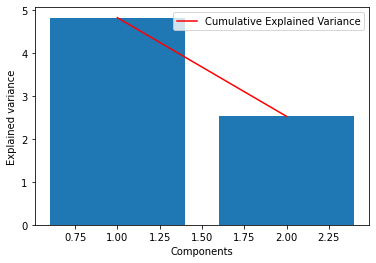

In [7]:
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'red',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

### Cumulative variance
Amount of variance of the original data explained by each type of model plotted against the number of components.

# PCA for Machine Learning Model

In [8]:
# import the libraries for the cancer datasert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
  
# instantiating
cancer = load_breast_cancer()
  
# creating dataframe
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
  
# checking head of dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

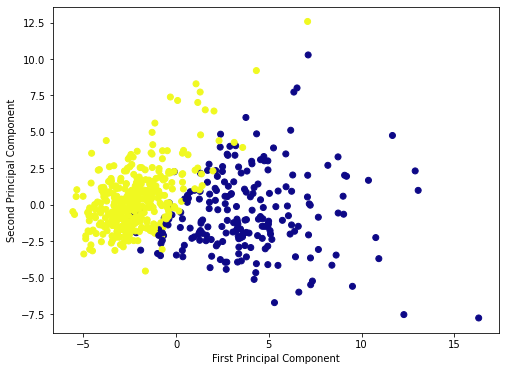

In [11]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [12]:
# Display components
pca.components_, pca.explained_variance_ratio_

(array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
          0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
          0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
          0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
          0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
          0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
        [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
          0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
         -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
          0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
         -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
          0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]]),
 array([0.44272026, 0.18971182]))

<AxesSubplot:>

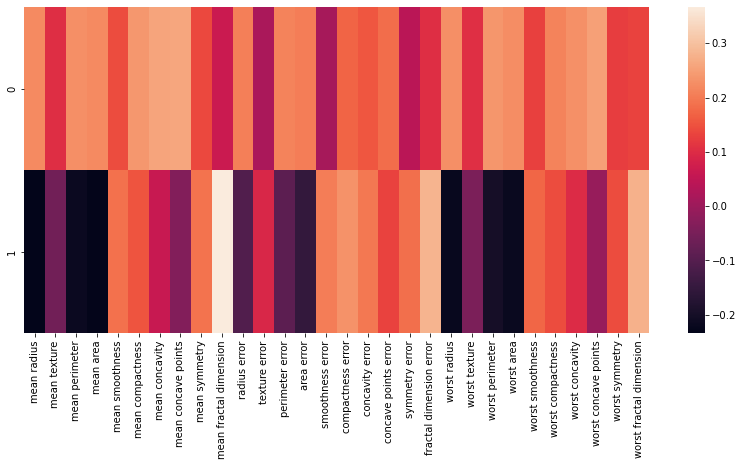

In [13]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

# K-means clustering

The K-means algorithm is also referred to as vector quantization. What the algorithm does is finds the cluster (centroid) positions that minimize the distances to all points in the cluster. This is done iteratively; the problem with the algorithm is that it can be a bit greedy, meaning that it will find the nearest minima quickly. This is generally solved with some kind of basin-hopping approach where the nearest minima found is randomly perturbed and the algorithm restarted. Due to this fact, the algorithm is dependent on good initial guesses as input.

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)

# build the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [15]:
# pip install mglearn

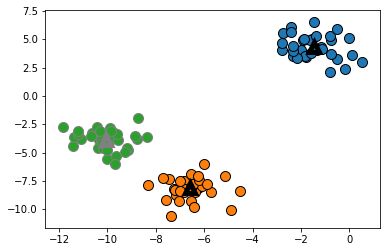

In [16]:
import mglearn
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers = '^', markeredgewidth = 5)

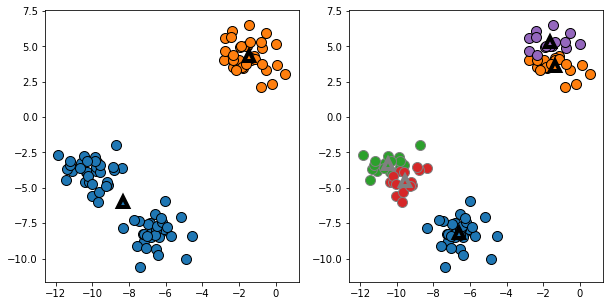

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# using two cluster centers:
kmeans1 = KMeans(n_clusters =  2)
kmeans1.fit(X)
assignments = kmeans1.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[0], markers = 'o')
mglearn.discrete_scatter(
kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], [0, 1], ax = axes[0], markers = '^', markeredgewidth = 4)

# using five cluster centers:
kmeans2 = KMeans(n_clusters = 5)
kmeans2.fit(X)
assignments = kmeans2.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[1], markers = 'o')
mglearn.discrete_scatter(
kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], [0, 1, 2, 3, 4], ax = axes[1], markers = '^', markeredgewidth = 4)

## Elbow Method

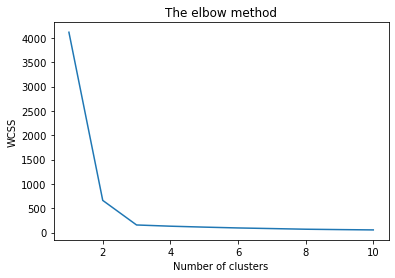

In [18]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

## Silhouette Score

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.770


# Case Study
## Suicide rate vs. GDP vs. absolute Latitude
Chapter 5, Mastering Python Data Analysis, Magnus Vilhelm Persson, Luiz Felipe Martins, Packt Publishing, 2016.

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy.random as rnd
import scipy.stats as st
import scipy.cluster.hierarchy as hac
import scipy.cluster.vq as vq

In [21]:
TABLE_FILE = 'data.h5'
d2 = pd.read_hdf(TABLE_FILE)
d2 = d2.dropna()
d2

,Country,Both,Male,Female,GDP_CD,DFE
0,Afghanistan,5.7,6.2,5.3,1932.891804,33.000000
1,Albania,5.9,6.6,5.2,10304.690686,41.000000
2,Algeria,1.9,2.3,1.5,14193.378405,28.000000
5,Armenia,2.9,5.0,0.9,8069.723499,40.000000
6,Australia,10.6,16.1,5.2,43929.860426,25.000000
...,...,...,...,...,...,...
160,United Arab Emirates,3.2,3.9,1.7,67674.134472,24.000000
164,Uruguay,12.1,20.0,5.2,20884.265495,33.000000
165,Uzbekistan,8.5,13.2,4.1,5573.112675,41.707542
169,Zambia,15.7,20.8,10.8,3904.025445,15.000000


In [22]:
rates = d2[['DFE','GDP_CD','Both']].values.astype('float')

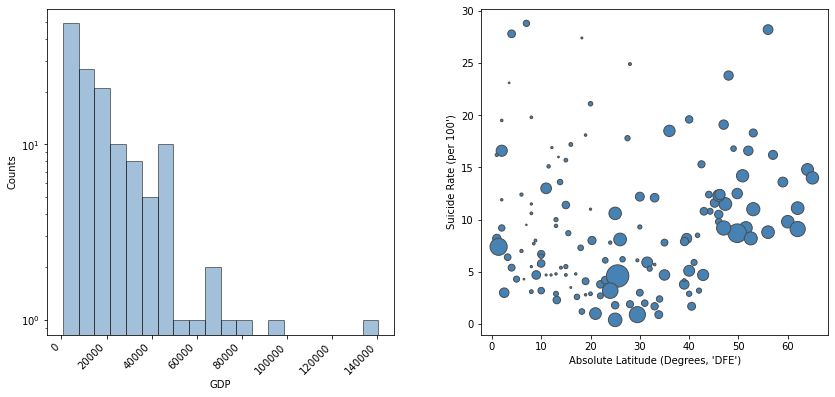

In [23]:
plt.subplots(12, figsize=(14,6))
plt.subplot(121)
plt.hist(rates.T[1], bins=20, color='SteelBlue', alpha=0.5, histtype='bar', ec='black')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('Counts')

plt.subplot(122)
plt.scatter(rates.T[0], rates.T[2], s=5e2*rates.T[1]/rates.T[1].max(),
           color='SteelBlue', edgecolors='0.3');
plt.xlabel('Absolute Latitude (Degrees, \'DFE\')')
plt.ylabel('Suicide Rate (per 100\')')
plt.subplots_adjust(wspace=0.25);

The scatter plot to the right shows the Suicide Rate on the y-axis and the Absolute Latitude on the x-axis. The size of each point is proportional to the country's GDP. The function to run the clustering k-means takes a special kind of normalized input. The data arrays (columns) have to be normalized by the standard deviation of the array. Although this is straightforward, there is a function included in the module called whiten. It will scale the data with the standard deviation:

In [24]:
w = vq.whiten(rates)

To show what it does to the data, we plot the preceding plots again, but with the output from the whiten function:

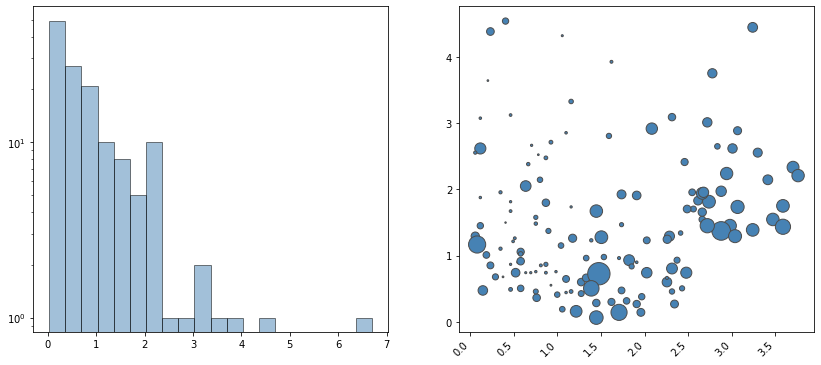

In [25]:
plt.subplots(12, figsize=(14,6))
plt.subplot(121)
plt.hist(w[:,1], bins=20, color='SteelBlue', alpha=0.5, histtype='bar', ec='black')
plt.yscale('log')
plt.subplot(122)
plt.scatter(w.T[0], w.T[2], s=5e2*w.T[1]/w.T[1].max(), 
            color='SteelBlue', edgecolors='0.3')
plt.xticks(rotation=45, ha='right');

As you can see, all the data is scaled from the previous figure. However, as mentioned, the scaling is just the standard deviation. So let's calculate the scaling and save it to the sc variable.

Now we are ready to estimate the initial guesses for the cluster centroids. Reading off the first plot of the data, we guess the centroids to be at 20 DFE, 200,000 GDP, and 10 suicides, and the second at 45 DFE, 100,000 GDP, and 15 suicides. We put this in an array and scale it with our scale parameter to the same scale as the output from the whiten function. This is then sent to the kmeans2 function of SciPy

In [26]:
init_guess = np.array([[20,20E3,10],[45,100E3,15]])
sc = rates.std(axis=0)
init_guess /= sc

z2_cb, z2_lbl = vq.kmeans2(w, init_guess, minit='matrix', iter=500)

There is another function, kmeans (without the 2), which is a less complex version and does not stop iterating when it reaches a local minima; it stops when the changes between two iterations goes below some level. Thus, the standard k-means algorithm is represented in SciPy by the kmeans2 function. The function outputs the centroids' scaled positions (here, z2_cb) and a lookup table (z2_lbl) telling us which row belongs to which centroid. To get the centroid positions in units we understand, we simply multiply with our scaling value.

In [27]:
z2_cb_sc = z2_cb * sc

At this point, we can plot the results. The following section is rather long and contains many different parts, so we will go through them section by section. However, the code should be run in one cell of the Notebook:

The last tweak to the plot is made by creating a custom legend. We want to show the different sizes of the points and what GDP they correspond to. As there is a continuous gradient from low to high, we cannot use the plotted points. Thus we create our own, but leave the x and y input coordinates as empty lists. This will not show anything in the plot but we can use them to register in the legend. The various tweaks to the legend function control different aspects of the legend layout. I encourage you to experiment with it to see what happens

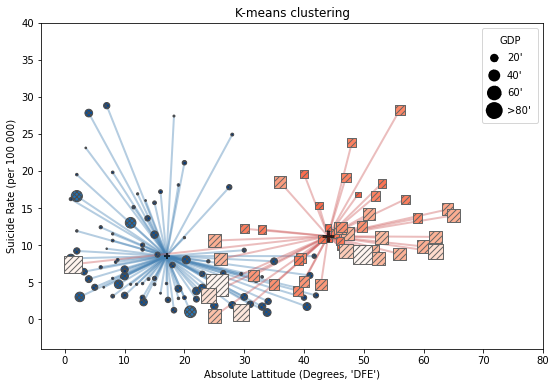

In [28]:
plt.figure(figsize=(9, 6))
plt.scatter(z2_cb_sc[0,0], z2_cb_sc[0,2], 
            s=5e2*z2_cb_sc[0,1]/rates.T[1].max(), 
            marker='+', color='k', edgecolors='k', 
            lw=2, zorder=10, alpha=0.7);
plt.scatter(z2_cb_sc[1,0], z2_cb_sc[1,2], 
            s=5e2*z2_cb_sc[1,1]/rates.T[1].max(), 
            marker='+', color='k', edgecolors='k', 
            lw=3, zorder=10, alpha=0.7);

s0 = abs(z2_lbl==0).astype('bool')
s1 = abs(z2_lbl==1).astype('bool')
pattern1 = 5*'x'
pattern2 = 4*'/'
plt.scatter(w.T[0][s0]*sc[0], 
            w.T[2][s0]*sc[2], 
            s=5e2*rates.T[1][s0]/rates.T[1].max(),
            lw=1,
            hatch=pattern1,
            edgecolors='0.3',
            color=plt.cm.Blues_r(
                rates.T[1][s0]/rates.T[1].max()));
plt.scatter(rates.T[0][s1],
            rates.T[2][s1], 
            s=5e2*rates.T[1][s1]/rates.T[1].max(),
            lw=1,
            hatch=pattern2,
            edgecolors='0.4',
            marker='s',
            color=plt.cm.Reds_r(
                rates.T[1][s1]/rates.T[1].max()+0.4))

for i in range(len(rates.T[0][s0])):
    plt.plot([z2_cb_sc[0,0], rates.T[0][s0][i]],
             [z2_cb_sc[0,2], rates.T[2][s0][i]], 
             color='SteelBlue', lw=2, alpha=0.4, 
             zorder=-1)
for i in range(len(rates.T[0][s1])):
    plt.plot([z2_cb_sc[1,0], rates.T[0][s1][i]],
             [z2_cb_sc[1,2], rates.T[2][s1][i]], 
             color='IndianRed', lw=2, alpha=0.4, 
             zorder=-1)

# create some *empty* patches to use for legend, 
p1 = plt.scatter([],[], hatch='None', 
                 s=20E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)
p2 = plt.scatter([],[], hatch='None',
                 s=40E3*5e2/rates.T[1].max(),  
                 color='k', edgecolors='None',)
p3 = plt.scatter([],[], hatch='None',
                 s=60E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)
p4 = plt.scatter([],[], hatch='None',
                 s=80E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)

labels = ["20\'", "40\'", "60\'", ">80\'"]

plt.legend([p1, p2, p3, p4], labels, ncol=1, 
           frameon=True, handlelength=1, 
           loc=1, borderpad=0.75,labelspacing=0.75,
           handletextpad=0.75, title='GDP')
plt.ylim((-4,40))
plt.xlim((-4,80))
plt.title('K-means clustering')
plt.xlabel('Absolute Lattitude (Degrees, \'DFE\')')
plt.ylabel('Suicide Rate (per 100 000)');

As for the final analysis, two different clusters are identified. Just as our previous hypothesis, there is a cluster with a clear linear trend with relatively higher GDP, which is also located at a higher absolute latitude. Although the identification is rather weak, it is clear that the two groups are separated. Countries with low GDP are clustered closer to the equator. What happens when you add more clusters? Try to add a cluster for the low DFE high-rate countries, visualize it, and think about what this could mean for the conclusion(s).